In [1]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [2]:
PATH = "/Users/rahul/Desktop/colorado_elev.vit"

In [3]:
bytes_list = []
with open(PATH,"rb") as fp:
    byte = fp.read(1)
    while byte:
        bytes_list.append(byte)
        byte = fp.read(1)

In [4]:
print(len(bytes_list))

160268


In [5]:
image_bytes = []
for i in range(268,len(bytes_list)):
    image_bytes.append(bytes_list[i])

In [6]:
len(image_bytes)

160000

In [7]:
image_int_list = []
for byte in image_bytes:
    byteToInt = int.from_bytes(byte,"big")
    image_int_list.append(byteToInt)

In [8]:
image_array = np.array(image_int_list,dtype=np.uint8).reshape(400,400)

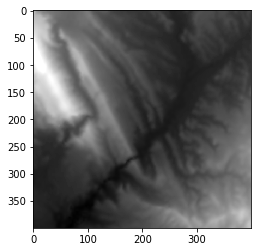

In [9]:
img = Image.fromarray(image_array)
imshow(img,cmap="gray")
#img.show()

In [10]:
actual_pillow_img = img.convert('RGB')
open_cv_image = np.array(actual_pillow_img)
open_cv_image.shape

(400, 400, 3)

In [11]:
open_cv_image_2d = open_cv_image[:,:,0]
open_cv_image_2d.shape

(400, 400)

In [12]:
np.mgrid[0:open_cv_image_2d.shape[0], 0:open_cv_image_2d.shape[1]]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [397, 397, 397, ..., 397, 397, 397],
        [398, 398, 398, ..., 398, 398, 398],
        [399, 399, 399, ..., 399, 399, 399]],

       [[  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        ...,
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399]]])

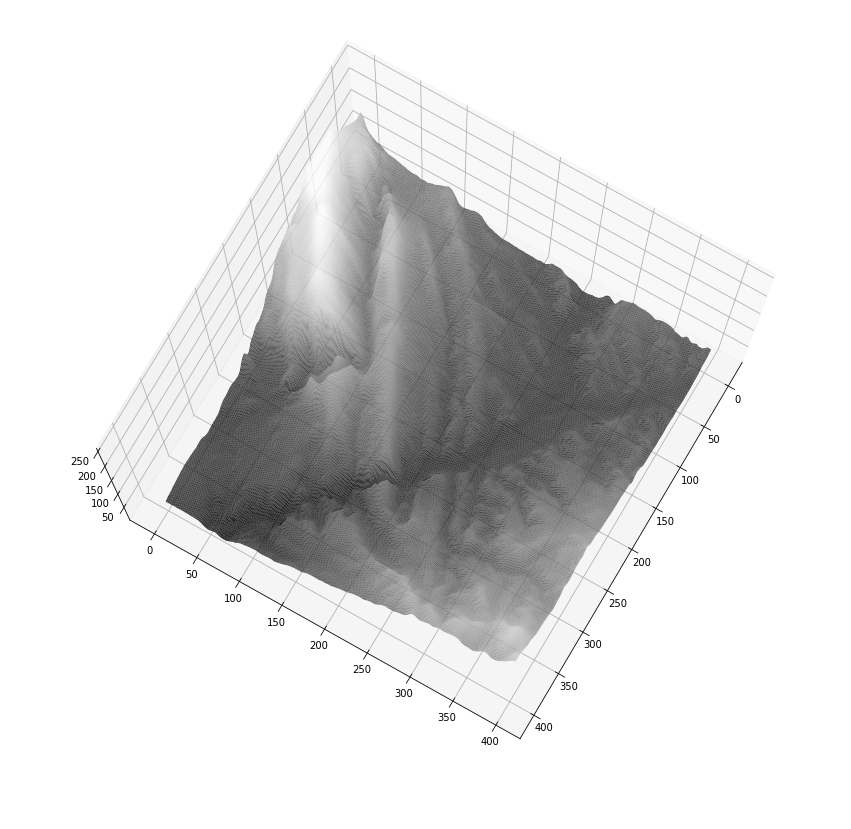

In [13]:
xx, yy = np.mgrid[0:open_cv_image_2d.shape[0], 0:open_cv_image_2d.shape[1]]
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, open_cv_image_2d ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
ax.view_init(80, 30)
plt.show()

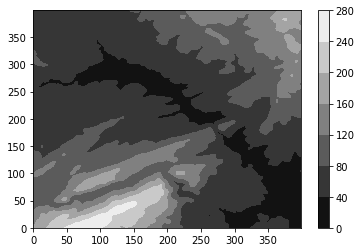

In [14]:
cp = plt.contourf(xx, yy, open_cv_image_2d,cmap="gray")
plt.colorbar(cp)
plt.show()